# Replikacija projekta 

In [44]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor

In [45]:

X_small = pd.read_csv('dataset_2_churn-bigml.csv')
X_small.head(2)
X_small.columns = [c.strip().lower().replace(' ', '_') for c in X_small.columns] #Preimenuj u mala slova


In [3]:
X_big = pd.read_csv('dataset_1_south_asia.csv')
#X_big.head(2)
#X_big.columns = [c.strip().lower().replace(' ', '_') for c in X_big.columns] #Preimenuj u mala slova

In [17]:
#1st step - data preprocessing
#noise removal

#provjera null vrijednosti i nedostajucih vrijednosti


In [13]:
print(X_small.isna().sum())
#X_small nema nedostajucih vrijednosti

state                     0
account_length            0
area_code                 0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64


In [18]:
print(X_big.isna().sum())
#X_big ima nedostajucih vrijednosti

msisdn                    0
total_calls_p1            0
total_mins_p1             0
total_calls_rev_p1        0
onnet_calls_p1            0
                      ...  
last_rchrg_amt            0
lst_rchrg_date        24853
rchrg_amt_exp_date    31973
lst_actvty_dt             0
churn                     0
Length: 180, dtype: int64


In [21]:
X_big.describe(include='O')

,activation_date,package_name,lst_rchrg_date,rchrg_amt_exp_date,lst_actvty_dt,churn
count,2913060,2660236,2888207,2881087,2913060,2913060
unique,23790,47,1344,1647,184,2
top,2011-07-19 00:00:00,Zong 80,2011-11-30 00:00:00,2011-12-15 00:00:00,2012-06-15 00:00:00,F
freq,10064,1425310,360795,283005,1126204,2769680


In [24]:
X_small.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Vizualizacija podataka - korelacija između churna i ostalih atributa

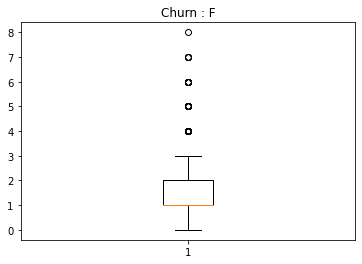

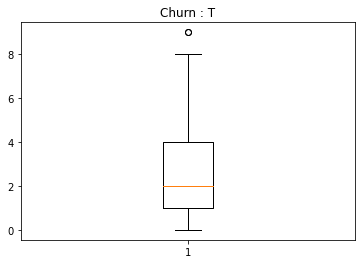

In [29]:
domena=[x for x in range(3333)]
groups = X_small.groupby('churn')
a=0
for name, group in groups:
    fig1, ax1 = plt.subplots()
    ax1.set_title('Churn : '+str(name))
    ax1.boxplot(group.customer_service_calls)
    #print('Churn : '+str(name))
    #print(group.customer_service_calls.describe())
    #print("_____________________________________________")

In [ ]:
groups = X_big.groupby('churn')
a=0
for name, group in groups:
    fig1, ax1 = plt.subplots()
    ax1.set_title('Churn : '+str(name))
    ax1.boxplot(group.lst_actvty_dt)
    #print('Churn : '+str(name))
    #print(group.total_day_minutes.describe())
    #print("_____________________________________________")

# Pretprocesiranje podataka

### U X_big datasetu je potrebno smanjiti broj značajki sa 29 na 17, dok je kod X_small dataseta potrebno smanjiti broj značajki sa 18 na 16 (izbaciti state i churn)


In [46]:
#OVAJ KOD POKRENI SAMO JEDNOM!!!
Y_small=X_small.pop('churn')
X_small.drop(('state'), axis=1, inplace=True)
Y_small = Y_small.map({'T':1 ,'F':0})

# Klasifikacija 

[Text(273.63314253644245, 212.26285714285714, 'X[5] <= 44.96\ngini = 0.248\nsamples = 3333\nvalue = [2850, 483]'),
 Text(226.41628507288493, 201.90857142857143, 'X[15] <= 3.5\ngini = 0.202\nsamples = 3122\nvalue = [2766, 356]'),
 Text(180.80757014576983, 191.5542857142857, 'X[3] <= 221.85\ngini = 0.147\nsamples = 2871\nvalue = [2642, 229]'),
 Text(125.26258693788111, 181.2, 'X[12] <= 13.15\ngini = 0.102\nsamples = 2401\nvalue = [2272, 129]'),
 Text(78.95718607088415, 170.84571428571428, 'X[13] <= 2.5\ngini = 0.079\nsamples = 2070\nvalue = [1985, 85]'),
 Text(36.937728658536585, 160.49142857142857, 'X[8] <= 23.395\ngini = 0.201\nsamples = 397\nvalue = [352, 45]'),
 Text(22.838871951219513, 150.13714285714286, 'X[2] <= 46.5\ngini = 0.169\nsamples = 364\nvalue = [330, 34]'),
 Text(21.477896341463417, 139.78285714285715, 'X[4] <= 46.5\ngini = 0.165\nsamples = 363\nvalue = [330, 33]'),
 Text(13.09939024390244, 129.42857142857144, 'X[0] <= 106.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 

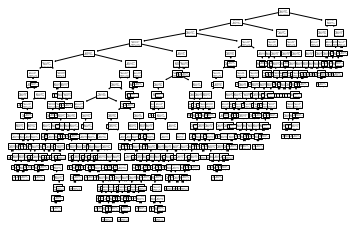

In [47]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_small, Y_small)
tree.plot_tree(clf)


In [48]:

X_train, X_test, Y_train, Y_test = train_test_split(X_small, Y_small, test_size=0.5, random_state=0)

# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")

46.16 %


In [54]:
# Random Forest
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
for i in range(len(y_pred)):
    if (y_pred[i]>0.5):
        y_pred[i]=1
    else:
        y_pred[i]=0
print(accuracy_score(Y_test, y_pred))

0.910617876424715


In [55]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [15]:
importances.head(17)

,importance
feature,
total_day_minutes,0.160
total_day_charge,0.139
customer_service_calls,0.126
total_eve_charge,0.079
total_eve_minutes,0.078
number_vmail_messages,0.054
total_night_minutes,0.046
total_night_charge,0.045
account_length,0.041


<AxesSubplot:xlabel='feature'>

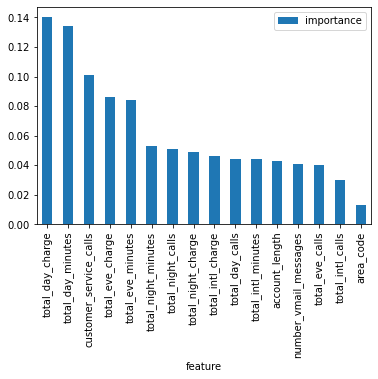

In [56]:
importances.plot.bar()

In [ ]:
#vidimo da area_code nema preveliki značaj, a u radu nije opisano koje značajke su uzete u obzir iz manjeg dataseta,
#samo piše da ih je 16 (numeričkih)

#attribute selection classifier ima u weka, što su oni koristili, ali nema python? random tree isto

#nije napisano koliki je test dataset, a koliki train?



In [57]:
#decision tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.8404319136172765


Accuracy: 0.8494301139772046


[Text(167.4, 163.07999999999998, 'X[3] <= 247.45\ngini = 0.24\nsamples = 1666\nvalue = [1434, 232]'),
 Text(83.7, 54.360000000000014, 'gini = 0.188\nsamples = 1489\nvalue = [1333, 156]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.49\nsamples = 177\nvalue = [101, 76]')]

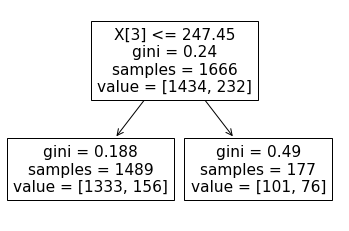

In [58]:
#decision stump
clf = DecisionTreeClassifier(max_depth = 1)
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
tree.plot_tree(clf)

In [59]:
#naive bayes
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("")

Number of mislabeled points out of a total 1667 points : 196


In [67]:
#perceptron
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
Perceptron()
clf.score(X, y)

0.9393433500278241

In [70]:
#logistics regression


clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.853629274145171